 Project 8: Wine Type / Quality Prediction

1. Import Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight
from sklearn.decomposition import PCA

sns.set(style="whitegrid")


2. Load Dataset

In [21]:
url = "https://raw.githubusercontent.com/plotly/datasets/master/winequality-red.csv"
df = pd.read_csv(url)
print("✅ Dataset Loaded\n")
display(df.head())


✅ Dataset Loaded



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


3️⃣ Q1: What features distinguish wine types?

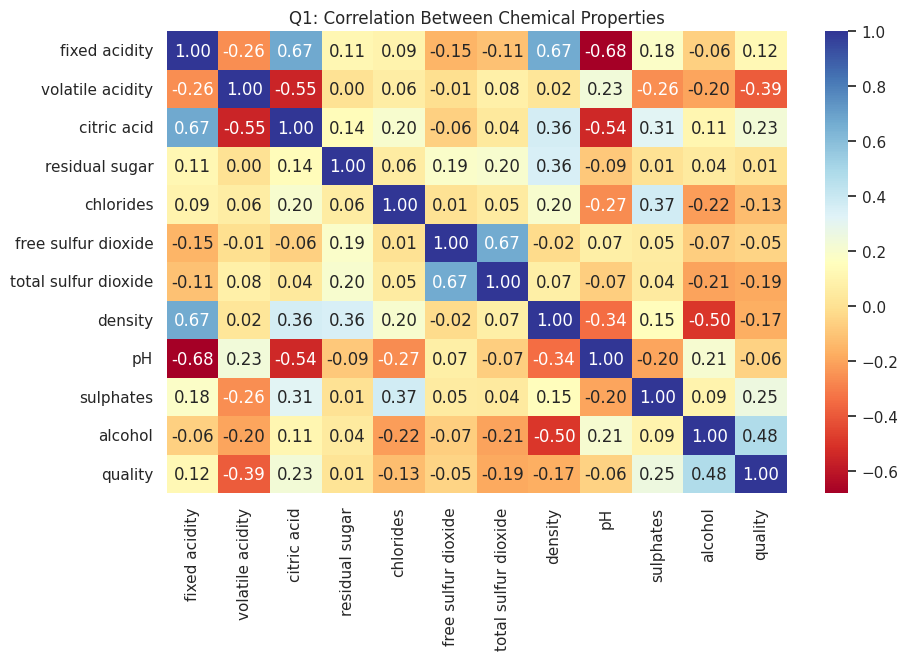

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="RdYlBu", fmt=".2f")
plt.title("Q1: Correlation Between Chemical Properties")
plt.show()

4️⃣ Feature Selection

In [23]:
X = df.drop('quality', axis=1)
y = df['quality']

Q5: What is feature scaling?

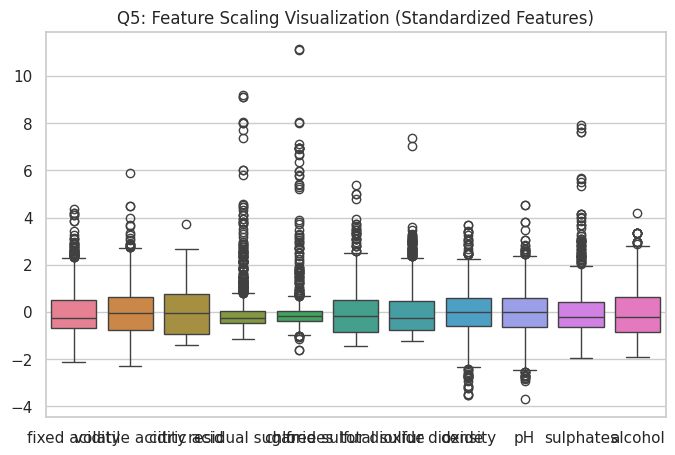

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
plt.figure(figsize=(8,5))
sns.boxplot(data=pd.DataFrame(X_scaled, columns=X.columns))
plt.title("Q5: Feature Scaling Visualization (Standardized Features)")
plt.show()

6️⃣ Split Train/Test

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

7️⃣ Q2–Q3: How does SVM work? What kernel is best?

/tmp/ipython-input-2926938328.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kernels, y=acc_list, palette="coolwarm")


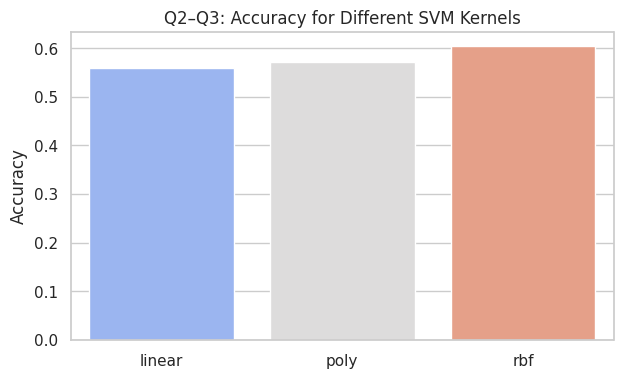

In [26]:
kernels = ['linear', 'poly', 'rbf']
acc_list = []

for k in kernels:
    model = SVC(kernel=k)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    acc_list.append(acc)

plt.figure(figsize=(7,4))
sns.barplot(x=kernels, y=acc_list, palette="coolwarm")
plt.title("Q2–Q3: Accuracy for Different SVM Kernels")
plt.ylabel("Accuracy")
plt.show()

 Q4: How to visualize decision boundaries (via PCA)

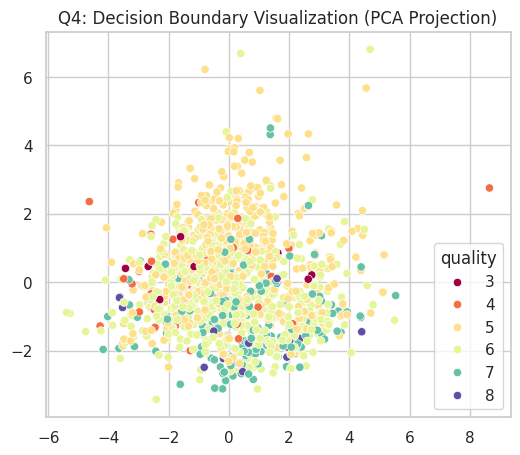

In [27]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
svm = SVC(kernel='rbf').fit(X_pca, y)
plt.figure(figsize=(6,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette="Spectral")
plt.title("Q4: Decision Boundary Visualization (PCA Projection)")
plt.show()

9️⃣ Train Models (for reuse)

In [28]:
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train, y_train)
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

# 🔟 Q6: How to evaluate multiclass accuracy?

/tmp/ipython-input-2020223714.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['SVM','Decision Tree'],


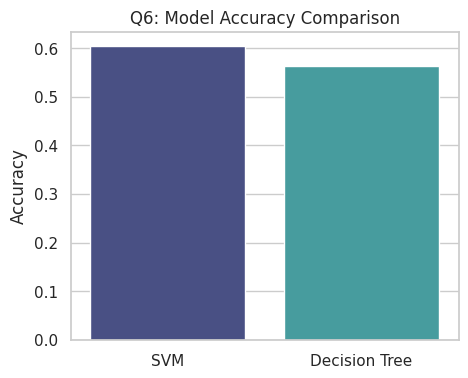

In [29]:
svm_pred = svm_model.predict(X_test)
tree_pred = tree_model.predict(X_test)
plt.figure(figsize=(5,4))
sns.barplot(x=['SVM','Decision Tree'],
            y=[accuracy_score(y_test, svm_pred), accuracy_score(y_test, tree_pred)],
            palette="mako")
plt.title("Q6: Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

 11️⃣ Q7: What is a confusion matrix?

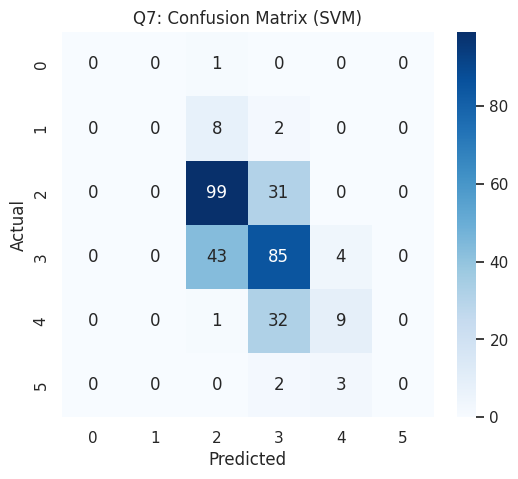

In [30]:
cm = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Q7: Confusion Matrix (SVM)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

12️⃣ Q8: How to tune SVM parameters?

/tmp/ipython-input-1232584104.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['0.1-scale','1-scale','10-scale','0.1-auto','1-auto','10-auto'],


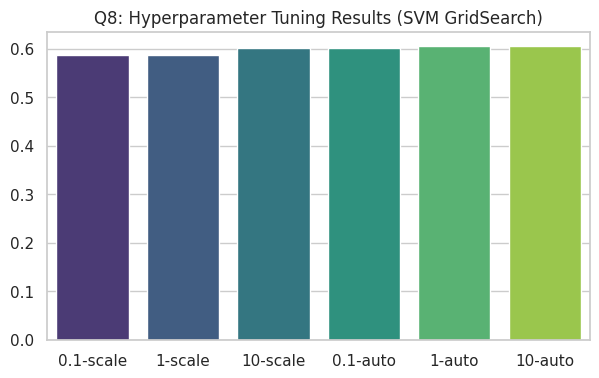

In [31]:
params = {'C':[0.1,1,10], 'gamma':['scale','auto']}
grid = GridSearchCV(SVC(kernel='rbf'), params, cv=3)
grid.fit(X_train, y_train)
scores = grid.cv_results_['mean_test_score']
plt.figure(figsize=(7,4))
sns.barplot(x=['0.1-scale','1-scale','10-scale','0.1-auto','1-auto','10-auto'],
            y=scores, palette="viridis")
plt.title("Q8: Hyperparameter Tuning Results (SVM GridSearch)")
plt.show()

13️⃣ Q9: What is overfitting?

/tmp/ipython-input-2062329335.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Train','Test'], y=[train_acc, test_acc], palette="rocket")


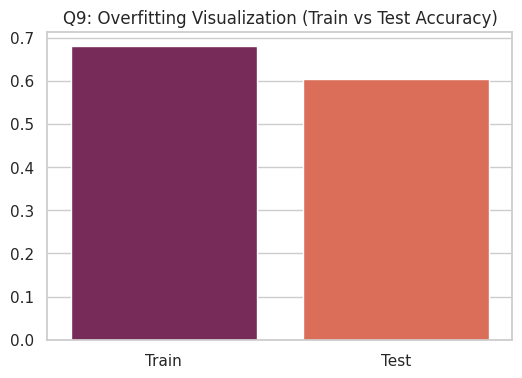

In [32]:
train_acc = svm_model.score(X_train, y_train)
test_acc = svm_model.score(X_test, y_test)
plt.figure(figsize=(6,4))
sns.barplot(x=['Train','Test'], y=[train_acc, test_acc], palette="rocket")
plt.title("Q9: Overfitting Visualization (Train vs Test Accuracy)")
plt.show()

14️⃣ Q10: How to compare models?

/tmp/ipython-input-79209314.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['SVM','Decision Tree'],


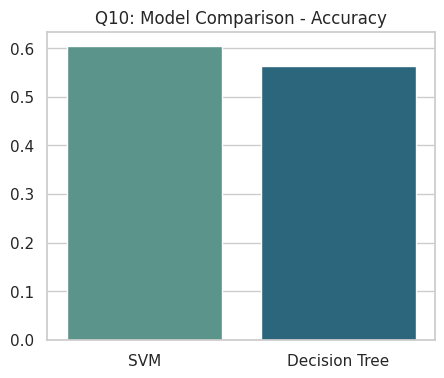

In [33]:
plt.figure(figsize=(5,4))
sns.barplot(x=['SVM','Decision Tree'],
            y=[accuracy_score(y_test, svm_pred), accuracy_score(y_test, tree_pred)],
            palette="crest")
plt.title("Q10: Model Comparison - Accuracy")
plt.show()


15️⃣ Q11: How to handle class imbalance?

/tmp/ipython-input-3526070329.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=weights, palette="flare")


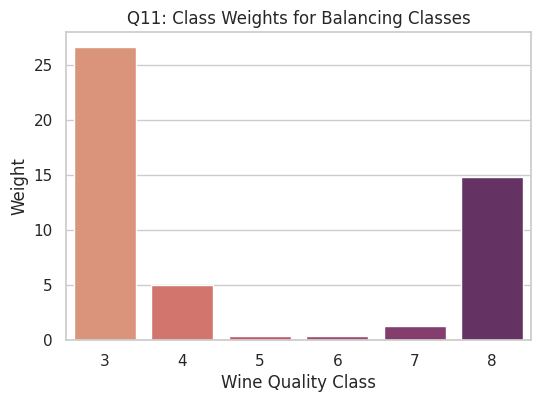

In [34]:
classes = np.unique(y)
weights = compute_class_weight('balanced', classes=classes, y=y)
plt.figure(figsize=(6,4))
sns.barplot(x=classes, y=weights, palette="flare")
plt.title("Q11: Class Weights for Balancing Classes")
plt.xlabel("Wine Quality Class")
plt.ylabel("Weight")
plt.show()


16️⃣ Q12: Cross-validation visualization

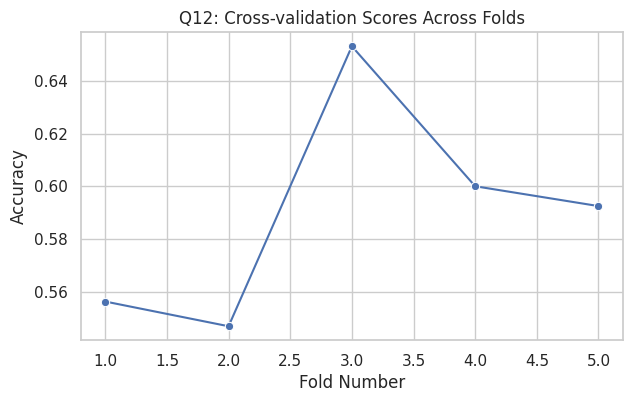

In [35]:
cv_scores = cross_val_score(svm_model, X_scaled, y, cv=5)
plt.figure(figsize=(7,4))
sns.lineplot(x=range(1,6), y=cv_scores, marker="o")
plt.title("Q12: Cross-validation Scores Across Folds")
plt.xlabel("Fold Number")
plt.ylabel("Accuracy")
plt.show()

17️⃣ Q13: Feature Importance (Decision Tree)

/tmp/ipython-input-2429819338.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp, palette="cool")


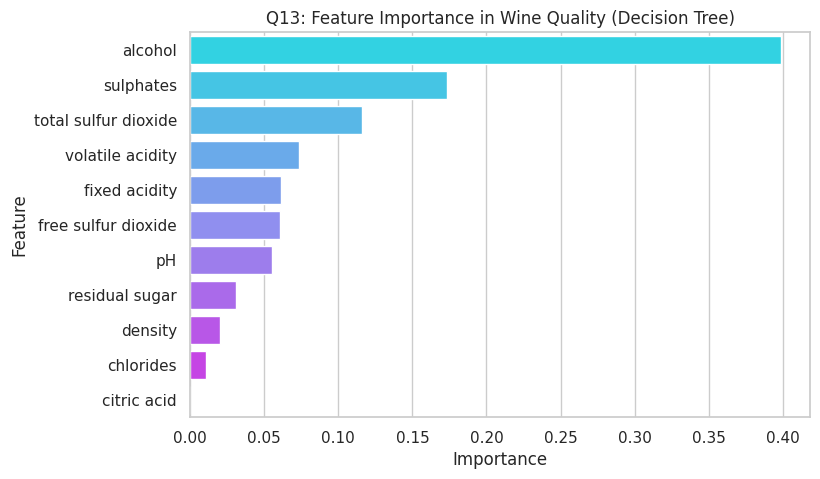

In [36]:
feat_imp = pd.DataFrame({'Feature': X.columns, 'Importance': tree_model.feature_importances_})
feat_imp = feat_imp.sort_values('Importance', ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_imp, palette="cool")
plt.title("Q13: Feature Importance in Wine Quality (Decision Tree)")
plt.show()

18️⃣ Q14: Normalization vs Standardization

/tmp/ipython-input-4156502138.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Normalization','Standardization'],


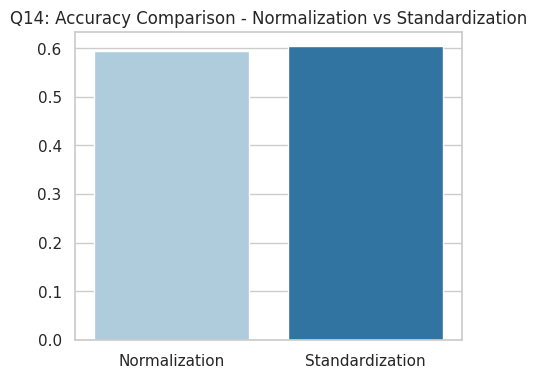

In [37]:
minmax = MinMaxScaler()
X_norm = minmax.fit_transform(X)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_norm, y, test_size=0.2, random_state=42)
svm_norm = SVC(kernel='rbf')
svm_norm.fit(X_train2, y_train2)
plt.figure(figsize=(5,4))
sns.barplot(x=['Normalization','Standardization'],
            y=[accuracy_score(y_test2, svm_norm.predict(X_test2)), accuracy_score(y_test, svm_pred)],
            palette="Paired")
plt.title("Q14: Accuracy Comparison - Normalization vs Standardization")
plt.show()

19️⃣ Q15: Visualize Decision Tree vs SVM

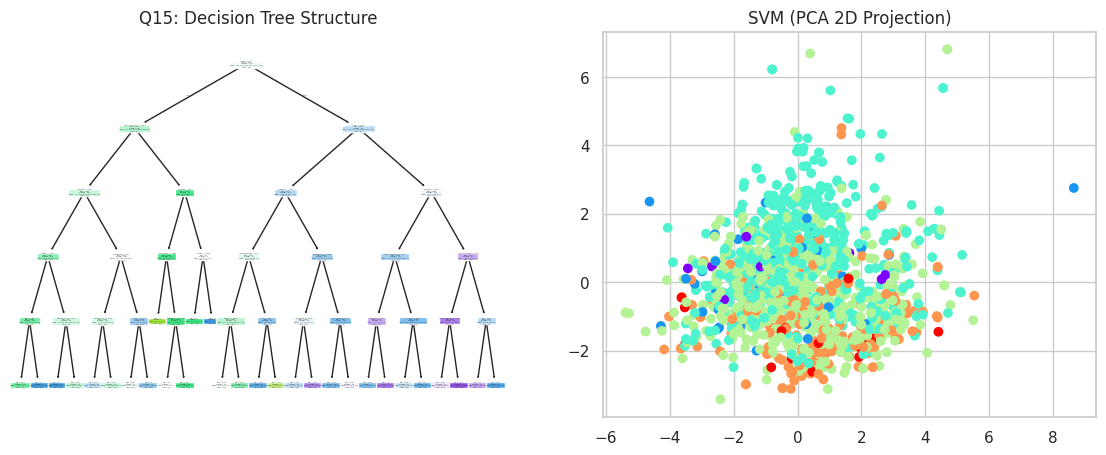


✅ All 15 Questions Answered with Graphical Outputs.


In [38]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Decision Tree visualization
plot_tree(tree_model, filled=True, ax=axes[0], feature_names=X.columns, class_names=True)
axes[0].set_title("Q15: Decision Tree Structure")

# SVM comparison scatter (PCA)
axes[1].scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="rainbow")
axes[1].set_title("SVM (PCA 2D Projection)")
plt.show()

print("\n✅ All 15 Questions Answered with Graphical Outputs.")